# Importing libraries

In [20]:
import gdal
import numpy
import osr
import matplotlib.pyplot as plt
import numpy as np

## Supporting Functions
### EPSG code from raster datasource

In [35]:
# Defining some functions
def get_EPSG(rast_obj):
    """
    Returns the EPSG code from a given input georeferenced image or virtual
    raster gdal object.
    """
    wkt = rast_obj.GetProjection()
    epsg = wkt2epsg(wkt)

    return epsg

### remaping array
Moves [3, 100, 200] to [100, 200, 3]

In [37]:
def remap_array(arr):
    """
    Remapping [3, 256,256] to [256,256,3]
    """
    return np.moveaxis(arr, 0, 2)

### wkt to epsg conversion

In [3]:
def wkt2epsg(wkt):

    """
    From https://gis.stackexchange.com/questions/20298/is-it-possible-to-get-the-epsg-value-from-an-osr-spatialreference-class-using-th
    Transform a WKT string to an EPSG code

    Arguments
    ---------

    wkt: WKT definition

    Returns: EPSG code

    """

    p_in = osr.SpatialReference()
    s = p_in.ImportFromWkt(wkt)
    if s == 5:  # invalid WKT
        return None
    if p_in.IsLocal() == 1:  # this is a local definition
        return p_in.ExportToWkt()
    if p_in.IsGeographic() == 1:  # this is a geographic srs
        cstype = 'GEOGCS'
    else:  # this is a projected srs
        cstype = 'PROJCS'
    an = p_in.GetAuthorityName(cstype)
    ac = p_in.GetAuthorityCode(cstype)
    if an is not None and ac is not None:  # return the EPSG code
        return int(p_in.GetAuthorityCode(cstype))

## Path location of raster dataset
### Reading attributes of raster dataset

In [4]:
path_tif = 'data/City.tif'

In [5]:
src_ds = gdal.Open(path_tif)
print(src_ds)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x109d4fba0> >


In [6]:
num_band = src_ds.RasterCount
print('Number of bands in source dataset: %d'%(num_band))

Number of bands in source dataset: 3


In [7]:
xsize = src_ds.RasterXSize
ysize = src_ds.RasterYSize
print('Size of raster : %d x , %d y'%(xsize, ysize))

Size of raster : 45276 x , 24557 y


In [8]:
resolution = src_ds.GetGeoTransform()
print('Pixel size of raster dataset: %f'%(resolution[1]))

Pixel size of raster dataset: 0.079250


In [9]:
projection = src_ds.GetProjection()

### Converting raster projection to epsg code

In [10]:
epsg_code = get_EPSG(src_ds)
print('EPSG projeciton code of raster dataset: %d'%(epsg_code))

EPSG projeciton code of raster dataset: 32721


### Defining exporting coordinate system and intermediate file

In [49]:
dst_proj = 'EPSG:4326'
intermediate_format = 'Gtiff'
dst_path = 'data/City_reprojected.tif'

In [12]:
dst_ds = gdal.Warp(dst_path, path_tif, dstSRS=dst_proj,
                        format=intermediate_format)

### Visualization of part of raster

In [47]:
arr = dst_ds.ReadAsArray(200,200,1000,1000)

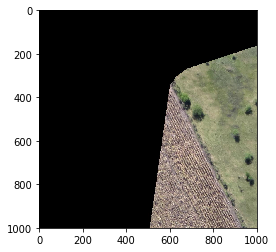

In [48]:
mode = remap_array(arr)
plt.imshow(mode)

### Saving to Disk

In [50]:
dst_ds.FlushCache()
dst_ds= None